In [20]:
using Plots
using FFTW

L = 100
N = 1000
M = 1000
dt = 1e-2
x = (L/N) .* collect(0:N-1)
k = 2*π / L .* collect(0:N÷2)
k² = k.*k
ik = im.*k
c = - k²
k1 = exp.(c .*dt)
k2 = (k1 .- 1.) ./ c
k2[1] = 0

F = plan_rfft(x)
B = plan_irfft(k*im, N)

V = cos.((2π/L) .* x) / 5
FV = F*V
v = -10*(B*(ik.*FV))

function antialiasing!( F )
    F[(end-(N÷2)÷3)+1:end] .= 0.
end

function etd!(Fφ, φ)
    Fφ .= k1 .* Fφ 
    # Fφ .+= - (k2 .* ik .* (F*(v.*φ)))
    φ .= B*Fφ
    antialiasing!(Fφ)
end


etd! (generic function with 2 methods)

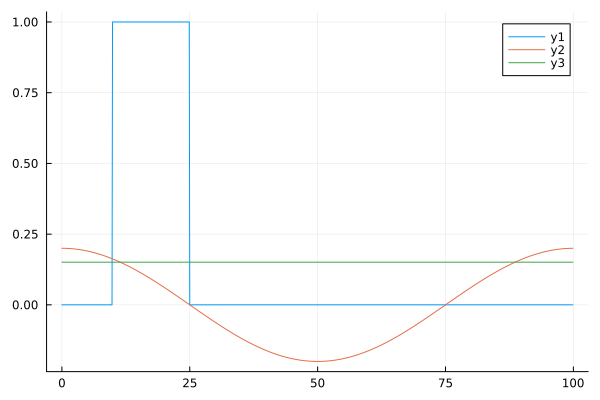

In [21]:
dφ = zeros(N)
a = 2
φ = zeros(N)
φ[100:250] .= 1.
Fφ = F*φ
plot(x, φ)
plot!(x, V)
plot!(x, sum(φ)/N .* ones(N))

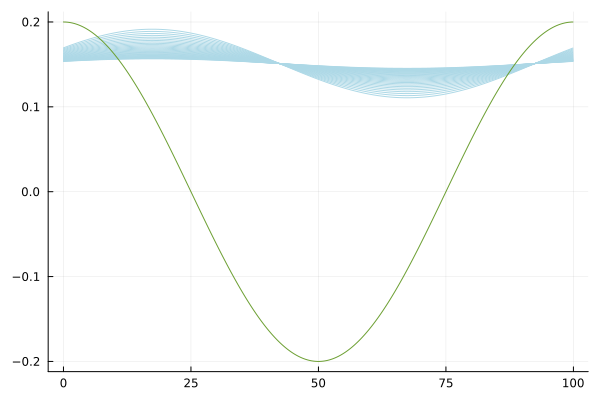

In [23]:
M = 50_000
p = plot(x, φ, color="lightblue")
av = sum(φ)/N
for t in 1:M
    etd!(Fφ, φ)
    if t%(M÷30) == 0
        @assert abs(av - sum(φ)/N) < 1e-15
        @assert !any(isnan.(Fφ))
        plot!(x, φ; color="lightblue")
    end
end

plot!(legend=false)
plot!(x, V)
display(p)

In [ ]:
1e-5 + 1e-18 ≈ 1e-5 